<a href="https://colab.research.google.com/github/martin-lopez25/mapa/blob/main/TP1%5Cmapa_de_porcentaje_poblacion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapa de porcentaje de poblacion sin acceso

In [ ]:
!pip install geopandas folium

In [ ]:
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import files

In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/mapas/shape_entidades_MGN2020.gpkg")
layers = gpd.read_file("/content/drive/MyDrive/mapas/shape_entidades_MGN2020.gpkg").keys()
poblacion=pd.read_csv('/content/drive/MyDrive/mapas/poblacion /Población Total y población sin derechohabiencia por estado.csv')

In [ ]:
# Muestra las primeras filas
print(gdf.head())
print("Capas disponibles:", layers)
gdf.to_file("nuevo_archivo.gpkg", driver="GPKG")
gdf.head()
gdf.info()

  CVEGEO CVE_ENT                NOMGEO  \
0     01      01        Aguascalientes   
1     02      02       Baja California   
2     03      03   Baja California Sur   
3     04      04              Campeche   
4     05      05  Coahuila de Zaragoza   

                                            geometry  
0  MULTIPOLYGON (((-102.29739 22.45527, -102.2955...  
1  MULTIPOLYGON (((-114.11561 28.09639, -114.1152...  
2  MULTIPOLYGON (((-109.89451 22.87476, -109.8946...  
3  MULTIPOLYGON (((-91.9565 20.197, -91.95636 20....  
4  MULTIPOLYGON (((-102.31549 29.88, -102.31509 2...  
Capas disponibles: Index(['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry'], dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    32 non-null     object  
 1   CVE_ENT   32 non-null     object  
 2   NOMGEO    32 non-null     object  
 3   geometry  32 non

In [ ]:
print(poblacion.shape)
poblacion.head()


(33, 8)


,entidad,nom_ent,pobtot,pder_imssb,pder_segp,psinder,pob_sin_acceso,porcentaje_sin_acceso
0,0,Total nacional,126014024,958787,32842765,32999713,66801265,53.010977
1,1,Aguascalientes,1425607,1680,271996,262088,535764,37.581465
2,2,Baja California,3769020,19862,515855,836317,1372034,36.402938
3,3,Baja California Sur,798447,3576,139342,129270,272188,34.089677
4,4,Campeche,928363,8950,327334,203304,539588,58.122523


In [ ]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entidad                33 non-null     int64  
 1   nom_ent                33 non-null     object 
 2   pobtot                 33 non-null     int64  
 3   pder_imssb             33 non-null     int64  
 4   pder_segp              33 non-null     int64  
 5   psinder                33 non-null     int64  
 6   pob_sin_acceso         33 non-null     int64  
 7   porcentaje_sin_acceso  33 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 2.2+ KB


In [ ]:
print("\nColumnas en datos de población:", poblacion.columns.tolist())
print("Columnas en datos geoespaciales:", gdf.columns.tolist())


Columnas en datos de población: ['entidad', 'nom_ent', 'pobtot', 'pder_imssb', 'pder_segp', 'psinder', 'pob_sin_acceso', 'porcentaje_sin_acceso']
Columnas en datos geoespaciales: ['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry']


In [ ]:
# 4. Unir los datos (asumiendo que 'nom_ent' en CSV corresponde a 'NOMGEO' en GPKG)
# Primero, verifiquemos los nombres de los estados en ambos conjuntos
print("\nEstados en datos de población:", poblacion['nom_ent'].unique())
print("Estados en datos geoespaciales:", gdf['NOMGEO'].unique())


Estados en datos de población: ['Total nacional' 'Aguascalientes' 'Baja California' 'Baja California Sur'
 'Campeche' 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua'
 'Ciudad de México' 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco'
 'México' 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca'
 'Puebla' 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora'
 'Tabasco' 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave'
 'Yucatán' 'Zacatecas']
Estados en datos geoespaciales: ['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


In [ ]:
# Hacer coincidir los nombres si es necesario (puede haber diferencias de formato)
# En este caso, parecen coincidir, pero verificamos:
gdf['NOMGEO'] = gdf['NOMGEO'].str.upper()  # Asegurar mayúsculas
poblacion['nom_ent'] = poblacion['nom_ent'].str.upper()

In [ ]:
# Unir los datos
gdf_merged = gdf.merge(poblacion, left_on='NOMGEO', right_on='nom_ent', how='left')

<Figure size 1500x1000 with 0 Axes>

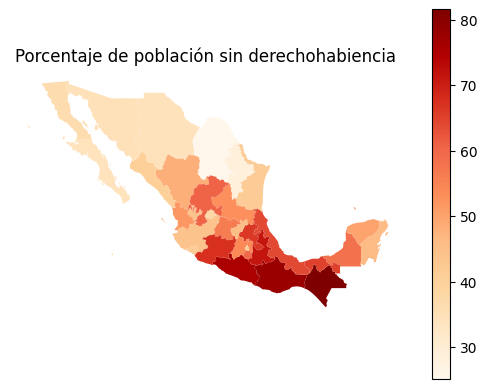

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Configuración del mapa
plt.figure(figsize=(15, 10))
gdf_merged.plot(column='porcentaje_sin_acceso',
                cmap='OrRd',
                legend=True,
                edgecolor='black',
                linewidth=0)
plt.title('Porcentaje de población sin derechohabiencia ')
plt.axis('off')

# Guardar el mapa como SVG
plt.savefig("mapa_derechohabiencia.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()  # Muestra el mapa en Colab

# Descargar el archivo SVG desde Colab
from google.colab import files
files.download("mapa_derechohabiencia.svg")


In [ ]:
!sudo apt-get update
!sudo apt-get install inkscape
!pip install python-pptx

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
svg_filename = "mapa_derechohabiencia.svg"
emf_filename = "/content/mapa_derechohabiencia.emf"

# Verifica si el archivo SVG existe antes de intentar la conversión
import os
if os.path.exists(svg_filename):
    # Ejecuta el comando inkscape para convertir SVG a EMF
    # get_ipython().system is a good way to run shell commands in Colab/IPython
    get_ipython().system(f'inkscape {svg_filename} --export-filename={emf_filename}')

    # Verifica si el archivo EMF fue creado exitosamente
    if os.path.exists(emf_filename):
        print(f"Archivo {emf_filename} creado exitosamente.")
    else:
        print(f"Error: {emf_filename} no fue creado por inkscape. Verifique la salida de inkscape.")
else:
    print(f"Error: Archivo de entrada {svg_filename} no encontrado.")

Failed to get connection
** (inkscape:50826): CRITICAL **: 20:01:28.885: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:50826): CRITICAL **: 20:01:28.885: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:50826): CRITICAL **: 20:01:28.885: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Archivo /content/mapa_derechohabiencia.emf creado exitosamente.


In [ ]:
# Descargar el archivo EMF desde Colab si no lo hiciste ya en el paso anterior
# Asegúrate de que este archivo exista localmente en tu entorno de Colab
emf_filename = "mapa_derechohabiencia.emf"
# Si el archivo no está en el directorio actual, especifica la ruta completa
# Por ejemplo: emf_filename = "/content/mapa_derechohabiencia.emf"

# --- Nuevo código para crear PowerPoint ---
from pptx import Presentation
from pptx.util import Inches
import os

# Verificar si el archivo EMF existe antes de intentar usarlo
if os.path.exists(emf_filename):
    # Crear una nueva presentación
    prs = Presentation()

    # Seleccionar un diseño de diapositiva en blanco (el índice 6 suele ser Blank)
    blank_slide_layout = prs.slide_layouts[6]
    slide = prs.slides.add_slide(blank_slide_layout)

    # Añadir la imagen EMF a la diapositiva
    # Puedes ajustar la posición (left, top) y el tamaño (width, height) según necesites
    left = Inches(0.5)
    top = Inches(1.5)
    width = Inches(9) # Ajusta esto al tamaño deseado
    # height = Inches(7) # Puedes especificar el alto o dejar que se ajuste automáticamente

    pic = slide.shapes.add_picture(emf_filename, left, top, width=width)

    # Guardar la presentación
    pptx_filename = "presentacion_mapa.pptx"
    prs.save(pptx_filename)

    print(f"Presentación '{pptx_filename}' creada exitosamente con el mapa.")

    # Descargar la presentación desde Colab
    from google.colab import files
    files.download(pptx_filename)

else:
    print(f"Error: El archivo EMF '{emf_filename}' no fue encontrado. Asegúrate de que se creó correctamente en el paso anterior.")

Presentación 'presentacion_mapa.pptx' creada exitosamente con el mapa.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>